In [1]:
import pandas as pd
import numpy as np
import numpy_indexed as npi
from itertools import combinations, product
from functools import reduce
from collections.abc import Iterable
import math
import timeit
import matplotlib.pyplot as plt
import matplotlib


In [2]:
real_dataset_path = "/home/sokhorn/sokhorn/dataSet/data/Online Retail.csv"
# testing_dataset_path = '/home/sokhorn/sokhorn/dataSet/data/sample_data_set.csv'
tranction_reduction_itemsets = '/home/sokhorn/sokhorn/dataSet/data/sample_tranc_red.csv'
sample_dataset = pd.read_csv(real_dataset_path, sep=',', )
sample_dataset.drop(['Unnamed: 0'], inplace=True, axis=1)


/home/sokhorn/.local/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3361: DtypeWarning: Columns (3) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [3]:
countries = sample_dataset['Country'].unique()
tranctions_count_by_cuntry = sample_dataset.groupby('Country').count()[
    'StockCode']
con_value = list(zip(countries,  tranctions_count_by_cuntry))
item_in_country =  pd.DataFrame(con_value, columns=['Country', 'Total Item'])
item_in_country

,Country,Total Item
0,United Kingdom,1259
1,France,401
2,Australia,19
3,Netherlands,2069
4,Germany,32
5,Norway,151
6,EIRE,758
7,Switzerland,622
8,Spain,30
9,Poland,389


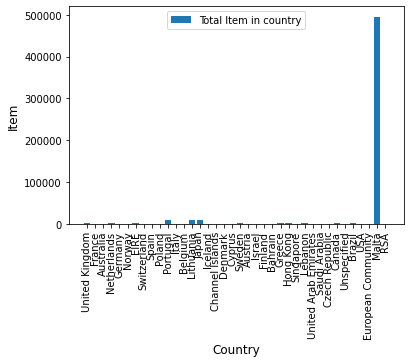

In [4]:
plt.xticks(rotation = 90)
plt.xlabel("Country", fontsize=12)
plt.ylabel("Item", fontsize=12)
plt.bar(item_in_country['Country'].values, item_in_country['Total Item'].values, label='Total Item in country')
plt.legend(loc='upper center')

In [5]:
def itemsett_by_country(country):
    item_sets_country = (
        sample_dataset[sample_dataset['Country'] == country].groupby(
            ['InvoiceNo', 'StockCode', ])['Quantity']
        .sum().unstack().reset_index().fillna(0)
        .set_index("InvoiceNo")
    )
    item_sets_country = item_sets_country.applymap(lambda x: 1 if x > 0 else 0)
    item_sets_country.reindex(sorted(item_sets_country.columns), axis=1)
    return item_sets_country


In [6]:
itemsett_by_country("Malta")

StockCode,20998,21035,21041,21126,21154,21231,21232,21446,21447,21555,...,84708B,84817,84820,84865,84997D,85034B,85034C,85123A,85230A,POST
InvoiceNo,,,,,,,,,,,,,,,,,,,,,
555931,0,1,1,1,1,1,1,1,1,1,...,1,0,0,1,0,1,0,1,1,1
557668,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
563353,1,0,0,0,0,0,0,0,0,0,...,0,1,1,0,1,0,0,0,0,0
563936,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
576897,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,1
C557054,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
C564751,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
C576898,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
C578274,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [7]:
itemset_france = itemsett_by_country('France')
# itemset_uk = itemsett_by_country('United Kingdom')
# itemset_australia = itemsett_by_country('Australia')
# itemset_netherlands = itemsett_by_country('Netherlands')
# itemset_germany = itemsett_by_country('Germany')
# itemset_norway = itemsett_by_country('Norway')
# itemset_switzerland = itemsett_by_country('Switzerland')
# itemset_spain = itemsett_by_country('Spain')
# itemset_poland = itemsett_by_country('Poland')
# itemset_portugal = itemsett_by_country('Portugal')
# itemset_italy = itemsett_by_country('Italy')


In [8]:
itemset_france

StockCode,10002,10120,10125,10135,11001,15036,15039,15044C,15056BL,15056N,...,90030C,90031,90099,90184B,90184C,90201B,90201C,C2,M,POST
InvoiceNo,,,,,,,,,,,,,,,,,,,,,
536370,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
536852,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
536974,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,1
537065,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
537463,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
C579532,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
C579562,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
C580161,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [9]:
CTR =  pd.read_csv('/home/sokhorn/sokhorn/Rupp/semester II/finalProject/apiori/visualize/out.csv').rename(
    columns={"Unnamed: 0": "Country"})
CTR

,Country,Tranction Size,Item Size
0,United Kingdom,23494,4065
1,France,461,1543
2,Australia,69,600
3,Netherlands,101,785
4,Germany,603,1671
5,Norway,40,591
6,EIRE,360,1976
7,Switzerland,74,978
8,Spain,105,1093
9,Poland,24,204


In [10]:
countries = CTR['Country'].unique()

In [11]:
tranction_size, item_size = CTR['Tranction Size'], CTR['Item Size']
x = np.arange(len(countries))

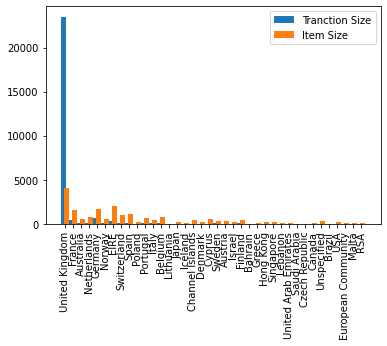

In [12]:
plt.xticks(x, countries)
plt.xticks(rotation=90)
plt.bar(x - 0.2, tranction_size, width=0.6, label="Tranction Size")
plt.bar(x + 0.2, item_size, width=0.6, label="Item Size")
plt.legend(loc='best')
matplotlib.rc('figure', figsize=[10, 5])
